Link to resource


https://www.geeksforgeeks.org/ml-credit-card-fraud-detection/

Dataset

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [3]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file
data = pd.read_csv("creditcard.csv")

In [8]:
# A first sight to
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [9]:
# Description of data
print(data.shape)
print(data.describe())

(21878, 31)
               Time            V1            V2            V3            V4  \
count  21878.000000  21878.000000  21878.000000  21878.000000  21878.000000   
mean   16924.271551     -0.241060      0.222124      0.737915      0.262153   
std    11005.409549      1.880901      1.518111      1.740947      1.451072   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%     5496.250000     -0.960913     -0.350012      0.298029     -0.649075   
50%    18770.500000     -0.299205      0.206484      0.888730      0.222271   
75%    27778.750000      1.164867      0.858497      1.520365      1.132694   
max    31907.000000      1.960497     16.713389      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  21878.000000  21878.000000  21878.000000  21878.000000  21878.000000   
mean      -0.175227      0.087496     -0.141011      0.019339      0.562079   
std        1.414872      1.322606      

In [10]:
# How are our data?
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.003946583451883806
Fraud Cases: 86
Valid Transactions: 21791


We had only a 0.3% fraudulent transactions out all the transactions.

Despite we have very unbalanced data, we are applying some models on this dataset without balancing to study its accuracy

In [12]:
# Details for fraudulent transactions
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count      86.000000
mean       93.996860
std       260.195133
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [13]:
# Details for normal transactions
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    21791.000000
mean        71.637403
std        204.790148
min          0.000000
25%          5.990000
50%         17.500000
75%         62.120000
max       7879.420000
Name: Amount, dtype: float64

The average money transaction for the fraudulent ones is more. This makes this problem crucial to deal with.

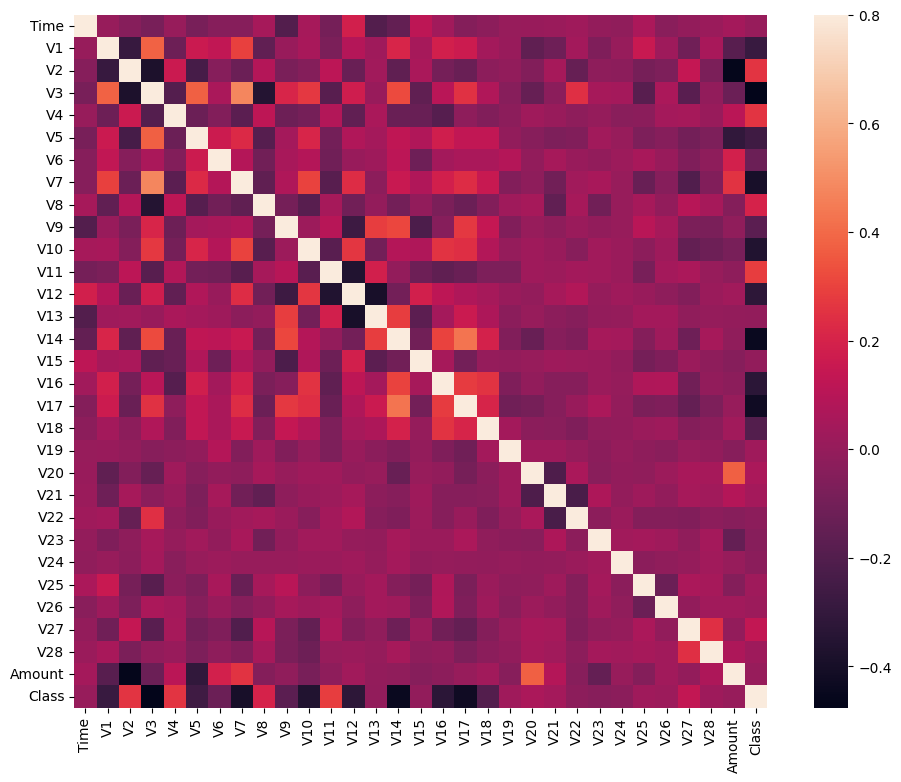

In [14]:
# Plotting the correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Despite there are not features with strong correlation, there are some features with strong negative correlation, as V2 and V5 with the feature Amount

In [15]:
# dividing the X and the Y from the dataset

# We have many columns, drop method is the fastest way to split the data
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(21878, 30)
(21878,)


In [16]:
# Dividing the dataset into training and test
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

In [21]:
# Building the Random Forest Classifier (RANDOM FOREST)

# The original code showed and error as the dataset downloaded from the link the
# author recommended had a NaN value in X.
from sklearn.ensemble import RandomForestRegressor

# Supongamos que tienes tus datos en las matrices xTrain y yTrain de tipo numpy.ndarray

# Crear un objeto SimpleImputer para imputar los valores NaN en xTrain y yTrain (por ejemplo, usando la media)
imputer_x = SimpleImputer(strategy='mean')
xTrain_imputed = imputer_x.fit_transform(xTrain)

imputer_y = SimpleImputer(strategy='mean')
yTrain_imputed = imputer_y.fit_transform(yTrain.reshape(-1, 1)).flatten()

# Creación y entrenamiento del modelo RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(xTrain_imputed, yTrain_imputed)

# Ahora puedes realizar las predicciones en xTest (asegúrate de que xTest también esté imputado si contiene NaN)
yPred = rfr.predict(xTest)
